## Importing libraries

In [1]:
# https://www.codegrepper.com/code-examples/python/pandas+disable+warnings (for the report)
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading files and data manipulation

The way the data was provided, we thought it would be best to create a JSON file with all the female profiles, and one with all the male profiles. From here, we are going to make them both dataframes, clean them seperately to use later, and then put the two dataframes together so we can do our analysis.

The `females`, `males`, and `profiles` datasets before any cleaning consists of the following columns:
- `id` -> a tag ranging from 1-50 in both the `males` and `females` JSON files that was given to profiles to keep track of them individually
- `gender` -> was defined in the JSON files as 0 for male and 1 for female, but we are refactoring it to just be a string of their gender for conciseness
- `bio` -> the given bio the user provided to Tinder
- `interests` -> is a list of the interests highlighted on each individual Tinder profile
- `anthem` -> is the genre of the profiles selected favorite song
- `prompts` -> is a list that contains the responses to Tinder's optional prompts

We plan on creating the following columns with the data provided from the aforementioned columns:
- `prompts_replied` -> the number of prompts replied to, which is specified in the `prompts` column list
- `bio_length` -> the length (in characters) of the users bio
- `num_interests` -> the number of interests specified in the `interests` column list

### Reading and cleaning the females dataset

In [2]:
# reading and cleaning the females dataset
females = pd.read_json('females.json')

# https://stackoverflow.com/questions/62343093/remove-empty-string-from-a-list-of-strings
females['prompts_replied'] = [len(list(filter(None, sublist))) for sublist in females['prompts']]

# we want to change the '1' to 'Female' for easier and cleaner data
females['gender'] = 'Female'

# we don't care about the actual bio itself for this research, we just want to know how long it is, so we're going to take the length and drop it
females['bio_length'] = females['bio'].str.split('').str.len()
females['bio_length'] = females['bio_length'].replace('', 0).astype('int')
females['bio_length'][females.bio_length == 2] = 0

# now that we have what we needed we drop for abstraction. for handling this data in python, we never needed the id column, so we drop it too
females = females.drop(['id', 'prompts', 'bio'], 1)

# and now we want to make sure that all prompts not filled out get replaced with NaN
females = females.replace('',np.nan)

females.head()

,gender,interests,anthem,prompts_replied,bio_length
0,Female,"[Coffee, Activism, Foodie, Music, Movies]",NaN,0,27
1,Female,"[Fashion, Karaoke, Museum, Brunch, Volunteering]",Hip Hop/Rap,1,60
2,Female,"[Foodie, Music, Karaoke, Dog lover, Comedy]",Hip Hop/Rap,3,63
3,Female,"[Foodie, Tattoos, Sports, Astrology, Spiritual...",Indie,0,75
4,Female,"[Photography, Black Lives Matter, Movies, Musi...",Pop,2,112


### Reading and cleaning the males dataset

In [3]:
males = pd.read_json('males.json')

# https://stackoverflow.com/questions/62343093/remove-empty-string-from-a-list-of-strings
males['prompts_replied'] = [len(list(filter(None, sublist))) for sublist in males['prompts']]

# we want to change the '0' to 'Male' for easier and cleaner data
males['gender'] = 'Male'

# we don't care about the actual bio itself for this research, we just want to know how long it is, so we're going to take the length and drop it
males['bio_length'] = males['bio'].str.split('').str.len()
males['bio_length'] = males['bio_length'].replace('', 0).astype('int')
males['bio_length'][males.bio_length == 2] = 0

# now that we have what we needed we drop for abstraction. for handling this data in python, we never needed the id column, so we drop it too
males = males.drop(['id', 'prompts', 'bio'], 1)

# and now we want to make sure that all prompts not filled out get replaced with NaN
males = males.replace('',np.nan)

males.head()

,gender,interests,anthem,prompts_replied,bio_length
0,Male,[Working out],NaN,0,36
1,Male,"[Outdoors, Netflix, Comedy, Hiking]",NaN,0,0
2,Male,"[Movies, Tattoos, Working out, Music, Sports]",NaN,3,0
3,Male,"[Travel, Music, Working out]",Hip Hop/Rap,0,114
4,Male,[Coffee],NaN,0,0


### Combining both dataframes, and further cleaning

In [4]:
# joining male and female datasets
profiles = females.append(males)

# now that we have both datasets joined, we want to take the length of the interests sublist and make that its own column
profiles['num_interests'] = profiles['interests'].str.len()
profiles['num_interests'] = profiles['num_interests'].replace(np.nan, 0)
profiles['num_interests'] = profiles['num_interests'].astype('int')

profiles.head()

,gender,interests,anthem,prompts_replied,bio_length,num_interests
0,Female,"[Coffee, Activism, Foodie, Music, Movies]",NaN,0,27,5
1,Female,"[Fashion, Karaoke, Museum, Brunch, Volunteering]",Hip Hop/Rap,1,60,5
2,Female,"[Foodie, Music, Karaoke, Dog lover, Comedy]",Hip Hop/Rap,3,63,5
3,Female,"[Foodie, Tattoos, Sports, Astrology, Spiritual...",Indie,0,75,5
4,Female,"[Photography, Black Lives Matter, Movies, Musi...",Pop,2,112,5


We ultimately chose to clean both male and female datasets seperately and then join them afterwards because when we realized that our data was already naturally faceted by gender, it was a lot easier for us to make conclusions based on the datasets seperately, as well as with them merged together as well. 

## Ascertaining information about most common interests

One of the first questions we had when looking at the data was; what are the most popular interests among males, females, and our dataframe with both combined?

In [5]:
from collections import Counter

def getMostCommonInterest(df):
    '''finding the most common interest for both genders'''
    interests = []
    for profile_interest_list in df.interests:
        interests += profile_interest_list
    c = Counter(interests)
    return c.most_common(5)

def generatePie(df):
    '''reusing code to plot a pie chart with a given dataframe and burst tuple for effects'''
    plot = getMostCommonInterest(df)
    ndf = pd.DataFrame(plot, columns=['Interest', 'Frequency'])

    plt.pie(ndf['Frequency'],labels=ndf['Interest'], explode=(0.1, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()


### Plotting top 5 most common interests among female profiles

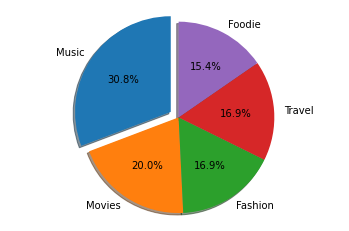

In [6]:
generatePie(females)


We see that `music` takes a commanding chunk for first place of the top 5 here for the females.

### Plotting top 5 most common interests among male profiles

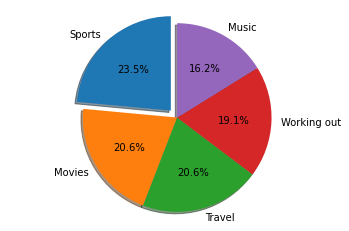

In [7]:
generatePie(males)

For males, the race was a bit closer but ultimately `sports` takes first place here.

### Plotting top 5 most common interests among all profiles

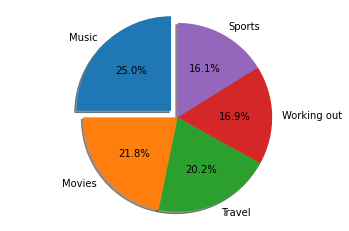

In [8]:
generatePie(profiles)

And for both combined, the race was also close, but since `music` was high on both, it makes sense for this to be the most common interest among both male and female profiles.

In [9]:
# we don't need these anymore
profiles = profiles.drop(['interests'], 1)

Now, we are going to abstract this `interests` column out because we don't need it anymore, and also because it looked a bit messy.

## Ascertaining information about those who chose to fill out the optional prompts

Our next curiousity was about the optional prompts that Tinder lets users fill out:
- What's your astrological sign?
- Do you have any pets?
- Are you a smoker?

We wanted to see how many profiles actually filled these out, because they're optional after all, and we were curious to see how many people are trying to go the extra mile.

### For males

<AxesSubplot:title={'center':'Male profiles vs optional prompts'}, xlabel='Prompts filled out', ylabel='Profiles'>

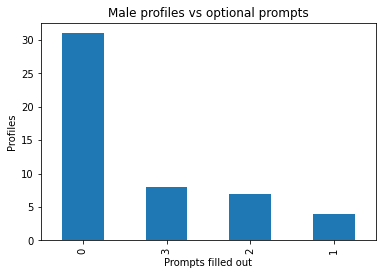

In [10]:
plt.title('Male profiles vs optional prompts')
plt.xlabel('Prompts filled out')
plt.ylabel('Profiles')
males['prompts_replied'].value_counts().plot(kind='bar')

A commanding amount of males ignored every question here completely, but filling them all out came in second.

### For females

<AxesSubplot:title={'center':'Female profiles vs optional prompts'}, xlabel='Prompts filled out', ylabel='Profiles'>

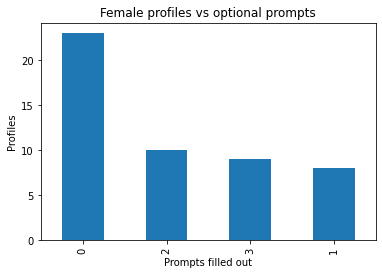

In [11]:
plt.title('Female profiles vs optional prompts')
plt.xlabel('Prompts filled out')
plt.ylabel('Profiles')
females['prompts_replied'].value_counts().plot(kind='bar')

A commanding amount of females also ignored every question here completely, but the race was closer between the other answers actually being filled out.

### For both male and females combined

<AxesSubplot:title={'center':'All profiles vs optional prompts'}, xlabel='Prompts filled out', ylabel='Profiles'>

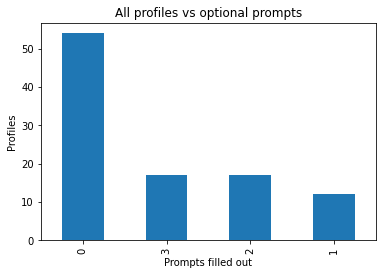

In [12]:
'''and then plot them (neaten it up)'''
plt.title('All profiles vs optional prompts')
plt.xlabel('Prompts filled out')
plt.ylabel('Profiles')
profiles['prompts_replied'].value_counts().plot(kind='bar')

Ultimately, it seems like Tinder might need to get some new optional prompt questions, because our profiles here don't seem to like them at all.

## Ascertaining information about bio length

Next up, we wanted to see about the profiles `bio`. Being able to describe yourself with a bio on a dating app is crucial, and we wanted to see how many characters our profiles thought they needed to say what they needed to say about themselves.

### The average bio length for a female profile based on our dataframe

In [13]:
females.bio_length.mean()

53.2

### The average bio length for a male profile based on our dataframe

In [14]:
males.bio_length.mean()

49.32

### The average bio length for any profile based on our dataframe

In [15]:
profiles.bio_length.mean()

51.26

Overall, this race is closer than we expected. We were anticipating a bigger discrepancy between male and female profiles, with female profiles having more to say about themselves. This hypothesis ended up being correct, but not at the degree we were expecting.

### Outliers (i): - largest bio length in the collection -

In [16]:
# get largest bio length
profiles.bio_length.max()

330

#### Outliers (i): - Who is our outlier? -

In [17]:
profiles[profiles.bio_length == profiles.bio_length.max()]

,gender,anthem,prompts_replied,bio_length,num_interests
48,Male,Country,2,330,5


It surprised us as well to see that the holder of the largest profile in our dataset here was in fact a male.

#### Outliers (i): - smallest bio length in the collection -

In [18]:
# get smallest bio length
profiles.bio_length.min()

0

#### Outliers (ii): - Who is our outlier? -

Well, we have had many profiles end up being 0, so we're going to go further into it and find out who is more likely to have an empty bio.

In [19]:
profiles[profiles.bio_length == 0]

,gender,anthem,prompts_replied,bio_length,num_interests
7,Female,Indie,0,0,5
11,Female,Pop,3,0,5
16,Female,NaN,0,0,5
20,Female,Pop,0,0,5
23,Female,NaN,1,0,5
26,Female,R&B,0,0,0
28,Female,NaN,0,0,3
31,Female,NaN,1,0,1
35,Female,Hip Hop/Rap,0,0,5
39,Female,Indie,0,0,3


As we can see, there are a lot of empty biographies here. Let's go further into this.

#### Outliers (ii): - How many males have empty bios? -

In [20]:
len(males[males.bio_length == 0])

19

#### Outliers (ii): - How many females have empty bios? -

In [21]:
len(females[females.bio_length == 0])

11

Therefore, we have 30/100 of these profiles that did not provide a bio, with 19/50 males, and 11/50 females not providing. Meaning that in our sample size, males are 16% less likely to include a bio than females.

#### Outliers (ii): - Let's take a look at all bio lengths -

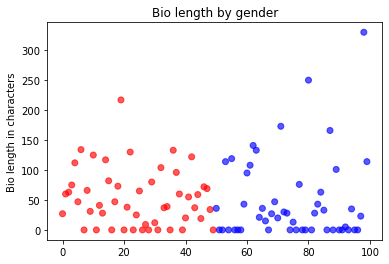

In [22]:
y=list(range(len(profiles.index)))
colors = {'Male': 'blue', 'Female': 'red'}

plt.title('Bio length by gender')
plt.ylabel('Bio length in characters')

plt.scatter(y, profiles['bio_length'], c=profiles['gender'].map(colors), alpha=0.65)

By taking a look at the scatter, we see that only a few profiles seem to have bio lengths over 150; let's take a look at them.

#### Outliers (ii): - Revisiting outliers -

In [23]:
profiles[profiles['bio_length'] >= 150]

,gender,anthem,prompts_replied,bio_length,num_interests
19,Female,Musical,3,217,5
21,Male,Country,0,173,0
30,Male,Hip Hop/Rap,2,250,4
37,Male,Dubstep,2,166,5
48,Male,Country,2,330,5


Surprisingly, 4 of the largest bio lengths in the entire set are males, though females seem to usually have more characters in their bios as a whole.

## Ascertaining information about favorite genres

Originally, we had this set up much different. Our JSON originally supplied us with the favorite song of the profile, but after doing some work with the data, we realized that there isn't really a story to tell with that information, given how small our dataset is in comparison to the amount of profiles that are on Tinder, we thought it wasn't a fair assessment, nor would it be compelling to share that maybe 3 profiles shared the same favorite song. So, we pivoted, and took their favorite song, and found the genre of it instead. So now, we'll be comparing favorite genres among male and female profiles instead.

In [24]:
# we are reusing this code used earlier to generate a pie chart, but this time we're making it work a bit differently for favorite genres
def generatePie2(df):
    '''reusing code to plot a pie chart with a given dataframe and burst tuple for effects'''
    plot = df.anthem.value_counts().head(3)
    ndf = pd.DataFrame(plot)
    ndf = ndf.reset_index()
    ndf.columns = ['Genre', 'Frequency']

    plt.pie(ndf['Frequency'],labels=ndf['Genre'], explode=(0.1, 0, 0), shadow=True, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()

### Females favorite genre based on our dataset

#### Plotting the top 3 female genres

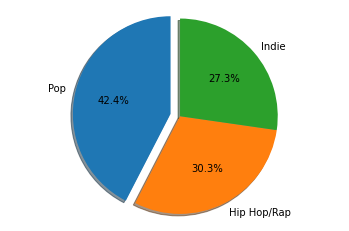

In [25]:
generatePie2(females)

Here, we can see that of the top 3 most popular genres for the females, the `Pop` genre is the most popular by a rather significant margin.

### Males favorite genre based on our dataset

#### Plotting the top 3 male genres

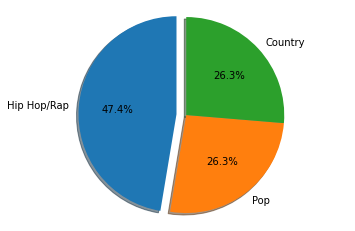

In [26]:
generatePie2(males)

For the males, we see that second and third place are a dead tie, and `Hip Hop/Rap` takes first place.

### All profiles favorite genre based on our dataset

#### Plotting the top 3 genres for all profiles

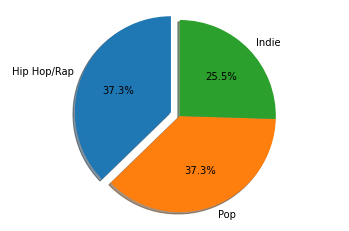

In [27]:
generatePie2(profiles)

In a very surprising and interesting twist, we actually have a tie between the three most common for both genders, as `Pop` and `Hip Hop/Rap` both have equal votes represented in the top 3.

## How many profiles had 'the perfect profile'?

To conclude, we wanted to have a little fun. We've seen all the profiles with no bios, and no interests. What about the profiles that did everything perfectly? Now we are going to see how many profiles filled out every prompt, had a bio, gave an anthem, and had at least three interests.

In [28]:
perfect_profiles = profiles[(profiles['bio_length'] > 0) & (profiles['num_interests'] >= 3) & (profiles['anthem'].notna()) & (profiles['prompts_replied'] == 3)]
len(perfect_profiles)

13

At the end of the day we can see now that only 13 out of our 100 profiles were 'perfect' by our definition. Let's see them:

In [29]:
perfect_profiles

,gender,anthem,prompts_replied,bio_length,num_interests
2,Female,Hip Hop/Rap,3,63,5
6,Female,Pop,3,134,5
13,Female,Hip Hop/Rap,3,28,5
17,Female,Hip Hop/Rap,3,47,4
19,Female,Musical,3,217,5
29,Female,Indie,3,80,5
38,Female,R&B,3,60,5
44,Female,Pop,3,59,5
14,Male,Hip Hop/Rap,3,21,4
18,Male,Hip Hop/Rap,3,27,3
